In [2]:
pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 9.3 MB/s eta 0:00:000m eta 0:00:010:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


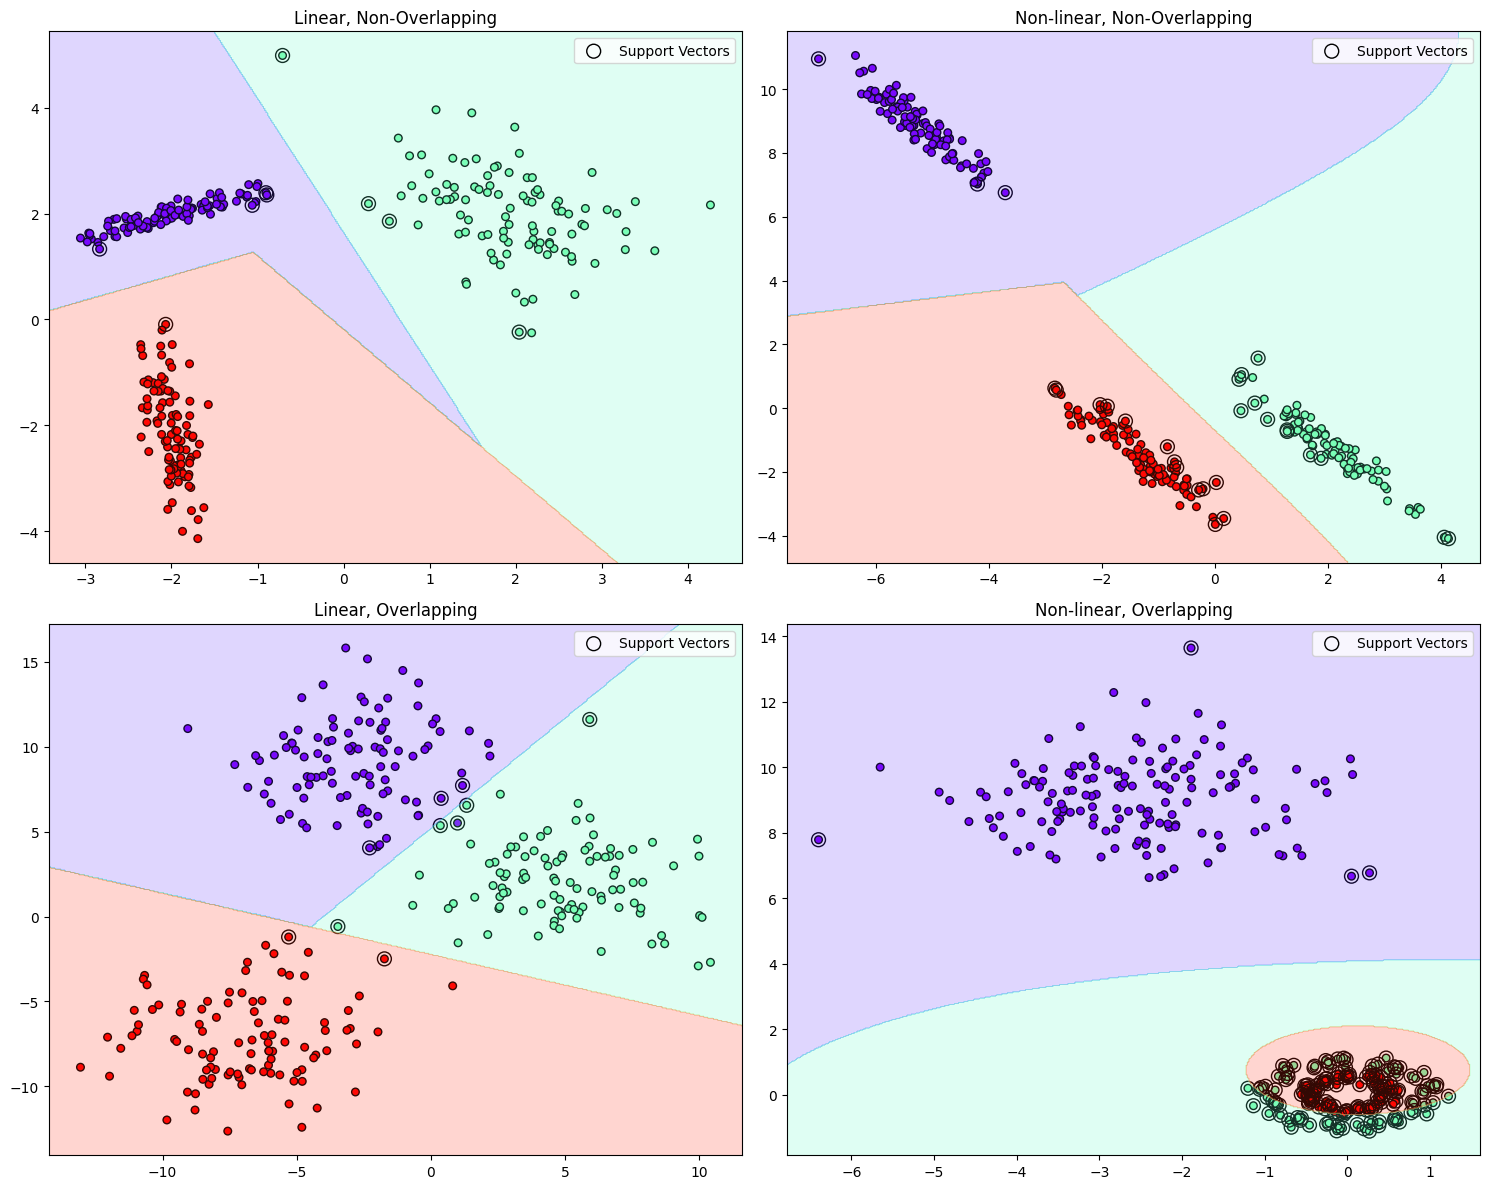

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_blobs
from sklearn.svm import SVC

def plot_svm(X, y, clf, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=30, edgecolors='k')
    
    # Plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               facecolors='none', edgecolors='k', label='Support Vectors')
    
    # Create grid to evaluate model
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))
    
    # Use predict to get class labels for each point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision regions with transparency
    ax.contourf(xx, yy, Z, alpha=0.2, cmap='rainbow')
    
    ax.set_title(title)
    ax.legend()

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# 1. Linear, non-overlapping (3-class)
X1, y1 = make_classification(n_samples=300, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=3, class_sep=2, random_state=42)
clf1 = SVC(kernel='linear')
clf1.fit(X1, y1)
plot_svm(X1, y1, clf1, axs[0,0], 'Linear, Non-Overlapping')

# 2. Non-linear, non-overlapping (3-class)
X2, y2 = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
X2 = np.dot(X2, [[0.6, -0.6], [-0.4, 0.8]])  # nonlinear transformation
clf2 = SVC(kernel='rbf', gamma='scale')
clf2.fit(X2, y2)
plot_svm(X2, y2, clf2, axs[0,1], 'Non-linear, Non-Overlapping')

# 3. Linear overlapping
X3, y3 = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)
clf3 = SVC(kernel='linear')
clf3.fit(X3, y3)
plot_svm(X3, y3, clf3, axs[1,0], 'Linear, Overlapping')

# 4. Non-linear overlapping (circles + blob combined)
X_circ, y_circ = make_circles(n_samples=150, factor=0.5, noise=0.1, random_state=42)
X_blob, y_blob = make_blobs(n_samples=150, centers=1, cluster_std=1.2, random_state=42)
X4 = np.vstack([X_circ, X_blob])
y4 = np.hstack([y_circ + 1, y_blob])  # classes: 1,2 overlapping with 0
clf4 = SVC(kernel='rbf', gamma='scale')
clf4.fit(X4, y4)
plot_svm(X4, y4, clf4, axs[1,1], 'Non-linear, Overlapping')

plt.tight_layout()
plt.show()


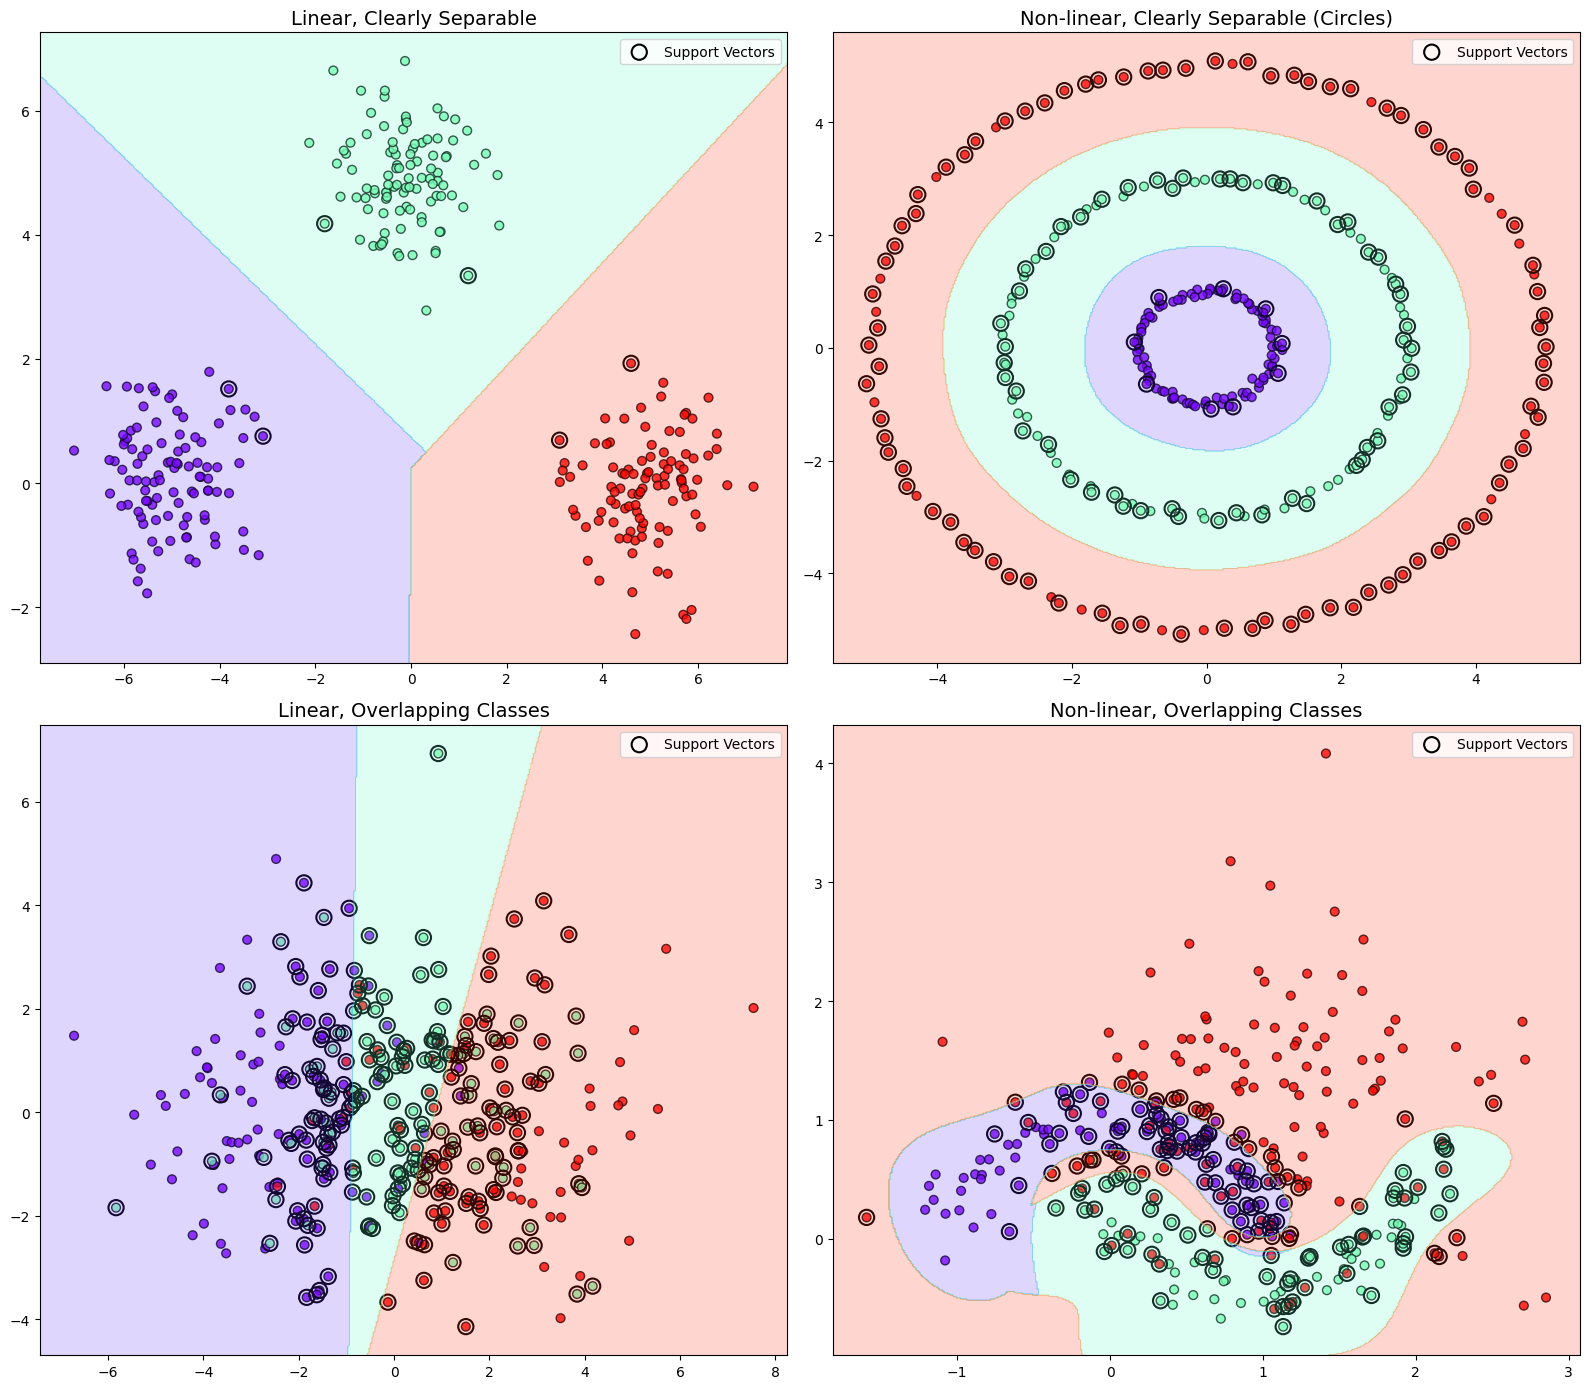

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC

def plot_svm(X, y, clf, ax, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=40, edgecolors='k', alpha=0.8)
    
    # Support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120,
               facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.2, cmap='rainbow')
    
    ax.set_title(title, fontsize=14)
    ax.legend()

fig, axs = plt.subplots(2, 2, figsize=(16, 14))

# 1. Linear, very clear separable (3 classes well separated)
X1, y1 = make_blobs(n_samples=300, centers=[(-5,0), (0,5), (5,0)], cluster_std=0.8, random_state=0)
clf1 = SVC(kernel='linear', C=1e5)  # high C for hard margin
clf1.fit(X1, y1)
plot_svm(X1, y1, clf1, axs[0,0], 'Linear, Clearly Separable')

# 2. Non-linear, clear concentric circles (3 classes)
# We'll create 3 circles with increasing radius for clear nonlinear separation
def make_three_circles(n_samples_per_class=100, noise=0.05):
    t = np.linspace(0, 2*np.pi, n_samples_per_class, endpoint=False)
    X = []
    y = []
    radii = [1, 3, 5]
    for i, r in enumerate(radii):
        x = r * np.cos(t) + noise * np.random.randn(n_samples_per_class)
        y_ = r * np.sin(t) + noise * np.random.randn(n_samples_per_class)
        X.append(np.vstack((x, y_)).T)
        y.append(np.full(n_samples_per_class, i))
    return np.vstack(X), np.hstack(y)

X2, y2 = make_three_circles()
clf2 = SVC(kernel='rbf', gamma=1.0, C=100)
clf2.fit(X2, y2)
plot_svm(X2, y2, clf2, axs[0,1], 'Non-linear, Clearly Separable (Circles)')

# 3. Overlapping classes, linear kernel (3 blobs with overlap)
X3, y3 = make_blobs(n_samples=300, centers=[(-2,0), (0,0), (2,0)], cluster_std=1.8, random_state=42)
clf3 = SVC(kernel='linear', C=1)
clf3.fit(X3, y3)
plot_svm(X3, y3, clf3, axs[1,0], 'Linear, Overlapping Classes')

# 4. Non-linear overlapping (blobs + moons combined)
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=150, noise=0.15, random_state=42)
X_blobs, y_blobs = make_blobs(n_samples=150, centers=[(1,1)], cluster_std=0.8, random_state=42)

X4 = np.vstack([X_moons, X_blobs])
y4 = np.hstack([y_moons, y_blobs + 2])  # moons classes: 0,1 and blob class: 2 (overlapping)

clf4 = SVC(kernel='rbf', gamma=1.5, C=10)
clf4.fit(X4, y4)
plot_svm(X4, y4, clf4, axs[1,1], 'Non-linear, Overlapping Classes')

plt.tight_layout()
plt.show()


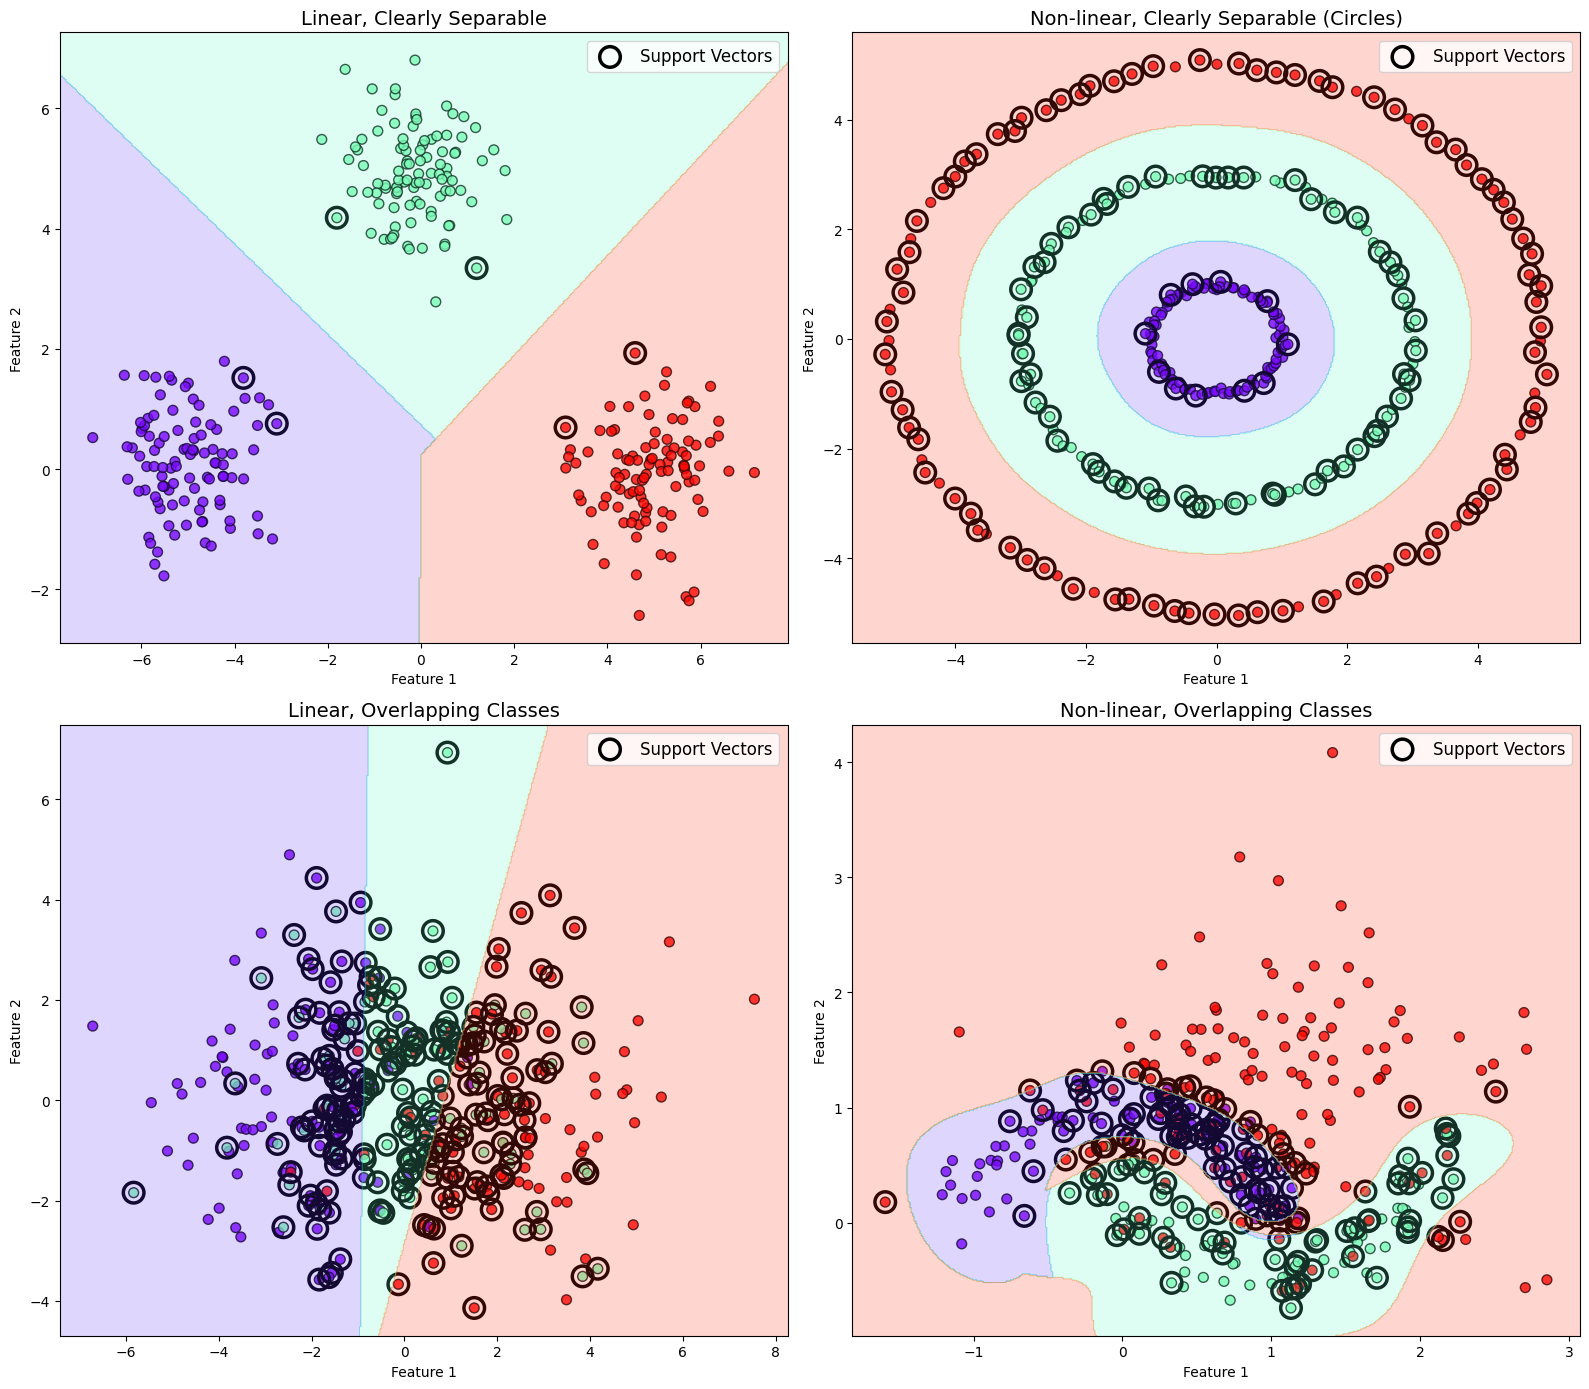

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC

def plot_svm(X, y, clf, ax, title):
    # Plot data points colored by class
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=50, edgecolors='k', alpha=0.8)
    
    # Plot support vectors with big open circles and thick black edges
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=220,
               facecolors='none', edgecolors='black', linewidths=2.5, label='Support Vectors')
    
    # Create a grid to plot decision boundaries
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision region with light color
    ax.contourf(xx, yy, Z, alpha=0.2, cmap='rainbow')
    
    ax.set_title(title, fontsize=14)
    ax.legend(fontsize=12)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

fig, axs = plt.subplots(2, 2, figsize=(16, 14))

# 1. Linear, clearly separable
X1, y1 = make_blobs(n_samples=300, centers=[(-5,0), (0,5), (5,0)], cluster_std=0.8, random_state=0)
clf1 = SVC(kernel='linear', C=1e5)
clf1.fit(X1, y1)
plot_svm(X1, y1, clf1, axs[0,0], 'Linear, Clearly Separable')

# 2. Non-linear, concentric circles
def make_three_circles(n_samples_per_class=100, noise=0.05):
    t = np.linspace(0, 2*np.pi, n_samples_per_class, endpoint=False)
    X = []
    y = []
    radii = [1, 3, 5]
    for i, r in enumerate(radii):
        x = r * np.cos(t) + noise * np.random.randn(n_samples_per_class)
        y_ = r * np.sin(t) + noise * np.random.randn(n_samples_per_class)
        X.append(np.vstack((x, y_)).T)
        y.append(np.full(n_samples_per_class, i))
    return np.vstack(X), np.hstack(y)

X2, y2 = make_three_circles()
clf2 = SVC(kernel='rbf', gamma=1.0, C=100)
clf2.fit(X2, y2)
plot_svm(X2, y2, clf2, axs[0,1], 'Non-linear, Clearly Separable (Circles)')

# 3. Linear overlapping
X3, y3 = make_blobs(n_samples=300, centers=[(-2,0), (0,0), (2,0)], cluster_std=1.8, random_state=42)
clf3 = SVC(kernel='linear', C=1)
clf3.fit(X3, y3)
plot_svm(X3, y3, clf3, axs[1,0], 'Linear, Overlapping Classes')

# 4. Non-linear overlapping (moons + blobs)
X_moons, y_moons = make_moons(n_samples=150, noise=0.15, random_state=42)
X_blobs, y_blobs = make_blobs(n_samples=150, centers=[(1,1)], cluster_std=0.8, random_state=42)

X4 = np.vstack([X_moons, X_blobs])
y4 = np.hstack([y_moons, y_blobs + 2])  # classes 0,1 (moons), 2 (blob)

clf4 = SVC(kernel='rbf', gamma=1.5, C=10)
clf4.fit(X4, y4)
plot_svm(X4, y4, clf4, axs[1,1], 'Non-linear, Overlapping Classes')

plt.tight_layout()
plt.show()
